In [167]:
import os 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import h5py
from ipywidgets import interact, interactive, fixed, interact_manual
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [245]:
!make

mpicxx -Wall -Wwrite-strings -Wno-strict-aliasing -Wno-unknown-pragmas -fstack-protector -fno-stack-check -fvisibility=hidden -g   -std=c++14  -I/Users/eduardogrossi/pets/arch-darwin-c-debug/include -I/Users/eduardogrossi/pets/include -I/usr/local/Cellar/gsl/2.6/include  -c -o ModelAlangevin.o ModelAlangevin.cxx
mpicxx -Wall -Wwrite-strings -Wno-strict-aliasing -Wno-unknown-pragmas -fstack-protector -fno-stack-check -fvisibility=hidden -g   -std=c++14  -I/Users/eduardogrossi/pets/arch-darwin-c-debug/include -I/Users/eduardogrossi/pets/include -I/usr/local/Cellar/gsl/2.6/include -L/Users/eduardogrossi/pets/arch-darwin-c-debug/lib -L/usr/local/Cellar/gsl/2.6/lib  -Wl,-rpath,/Users/eduardogrossi/pets/arch-darwin-c-debug/lib  -Wl,-rpath,/usr/local/Cellar/gsl/2.6/lib  -o ModelAlangevin.exe ModelAlangevin.o -lpetsc -lgsl -lgslcblas -lm -lm -lstdc++


In [251]:
!mpiexec -n 2 ModelAlangevin.exe 

 hx = 0.0666667, hy = 0.0666667
 hx = 0.0666667, hy = 0.0666667
HDF5-DIAG: Error detected in HDF5 (1.12.0) thread 0:
  #000: H5F.c line 705 in H5Fcreate(): unable to create file
    major: File accessibility
    minor: Unable to open file
  #001: H5VLcallback.c line 3393 in H5VL_file_create(): file create failed
    major: Virtual Object Layer
    minor: Unable to create file
  #002: H5VLcallback.c line 3358 in H5VL__file_create(): file create failed
    major: Virtual Object Layer
    minor: Unable to create file
  #003: H5VLnative_file.c line 65 in H5VL__native_file_create(): unable to create file
    major: File accessibility
    minor: Unable to open file
  #004: H5Fint.c line 1622 in H5F_open(): unable to lock the file
    major: File accessibility
    minor: Unable to open file
  #005: H5FD.c line 1675 in H5FD_lock(): driver lock request failed
    major: Virtual File Layer
    minor: Can't update object
  #006: H5FDsec2.c line 959 in H5FD_sec2_lock(): unable to lock file, errno 

In [247]:
with h5py.File('output.h5','r') as output:
    print(list(output.keys()))
    sol=output["Timestepsolution"]["solution"]
    print(sol)
    print("Type of sol", type(sol),sol.shape) 
    dset=sol[:,:,:,:]
    print("Type of dset", type(dset),dset.shape) 
    tcenter=dset[3:100,8,8,8,0:4]

['Timestepsolution', 'noise']
<HDF5 dataset "solution": shape (226, 16, 16, 16, 4), type "<f8">
Type of sol <class 'h5py._hl.dataset.Dataset'> (226, 16, 16, 16, 4)
Type of dset <class 'numpy.ndarray'> (226, 16, 16, 16, 4)


In [248]:
def f(i):
    plt.contourf(dset[i,:,:,8,3])
   
    plt.show()

interactive_plot = interactive(f, i=(0,101,1))
interactive_plot

interactive(children=(IntSlider(value=50, description='i', max=101), Output()), _dom_classes=('widget-interact…

### 

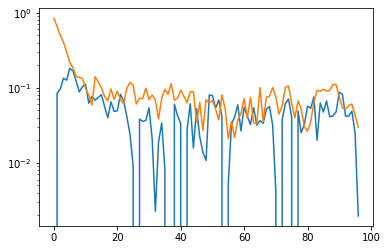

In [249]:

plt.plot(tcenter)
plt.yscale('log')

In [138]:
with h5py.File('output.h5','r') as output:
    print(list(output.keys()))
    noise=output["/noise"]["prova"]
    print("Type of sol", type(noise),noise.shape) 
    rumore= noise[:,1,1,1]
    

['Timestepsolution', 'noise']
Type of sol <class 'h5py._hl.dataset.Dataset'> (16, 16, 16, 4)


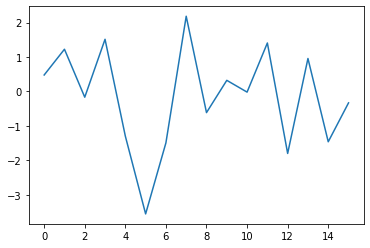

In [139]:
plt.plot(rumore)

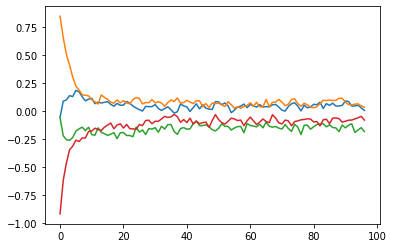

In [250]:
plt.plot(tcenter)